# IDEA:
Young adults are more likely to choose biking for commuting.

# NULL HYPOTHESIS:

The ratio of subscribers aged 25-34 biking on weekends over biking on weekdays is the same or higher than the ratio of subscribers aged 35-44 biking over weekends to biking on weekdays

**I will use a significance level of alpha = 0.05**

H0 : Old.weekend/Old.week <= Young.weekend/Young.week

H1 : Old.weekend/Old.week > Young.weekend/Young.week

In [135]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import urllib2
import zipfile

%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUIDATA")

import json
import csv
import requests

Populating the interactive namespace from numpy and matplotlib


In [136]:
#developed using answer by David Robinson here http://stackoverflow.com/questions/8814813/saving-a-downloaded-zip-file-w-python
datestring = '201606'
download = "https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip"
if os.path.isfile(datestring + "-citibike-tripdata.zip"):
    print("zip file already exists")
else:
    request = urllib2.urlopen (download)
    output = open(datestring + "-citibike-tripdata.zip", "w")
    output.write(request.read())
    output.close()

zip file already exists


In [137]:
if os.path.isfile(datestring + "-citibike-tripdata.csv"):
    print ("csv file already exists")
else:
    os.system("unzip " + datestring + "-citibike-tripdata.zip")

csv file already exists


In [138]:
df = pd.read_csv(datestring + "-citibike-tripdata.csv")
df['date'] = pd.to_datetime(df['starttime'])
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1470,6/1/2016 00:00:18,6/1/2016 00:24:48,380,W 4 St & 7 Ave S,40.734011,-74.002939,3236,W 42 St & Dyer Ave,40.758985,-73.993800,19859,Subscriber,1972.0,1,2016-06-01 00:00:18
1,229,6/1/2016 00:00:20,6/1/2016 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,16233,Subscriber,1967.0,1,2016-06-01 00:00:20
2,344,6/1/2016 00:00:21,6/1/2016 00:06:06,449,W 52 St & 9 Ave,40.764618,-73.987895,469,Broadway & W 53 St,40.763441,-73.982681,22397,Subscriber,1989.0,1,2016-06-01 00:00:21
3,1120,6/1/2016 00:00:28,6/1/2016 00:19:09,522,E 51 St & Lexington Ave,40.757148,-73.972078,401,Allen St & Rivington St,40.720196,-73.989978,16231,Subscriber,1991.0,1,2016-06-01 00:00:28
4,229,6/1/2016 00:00:53,6/1/2016 00:04:42,335,Washington Pl & Broadway,40.729039,-73.994046,285,Broadway & E 14 St,40.734546,-73.990741,15400,Subscriber,1989.0,1,2016-06-01 00:00:53


In [139]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date'],
      dtype='object')

In [140]:
df.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'gender'], axis=1, inplace=True)

In [141]:
df.head()

,usertype,birth year,date
0,Subscriber,1972.0,2016-06-01 00:00:18
1,Subscriber,1967.0,2016-06-01 00:00:20
2,Subscriber,1989.0,2016-06-01 00:00:21
3,Subscriber,1991.0,2016-06-01 00:00:28
4,Subscriber,1989.0,2016-06-01 00:00:53


In [142]:
df[df['usertype'].str.contains("Subscriber")]
df.head()

,usertype,birth year,date
0,Subscriber,1972.0,2016-06-01 00:00:18
1,Subscriber,1967.0,2016-06-01 00:00:20
2,Subscriber,1989.0,2016-06-01 00:00:21
3,Subscriber,1991.0,2016-06-01 00:00:28
4,Subscriber,1989.0,2016-06-01 00:00:53


In [143]:
df1 = df[np.isfinite(df['birth year'])]
df1.head()

,usertype,birth year,date
0,Subscriber,1972.0,2016-06-01 00:00:18
1,Subscriber,1967.0,2016-06-01 00:00:20
2,Subscriber,1989.0,2016-06-01 00:00:21
3,Subscriber,1991.0,2016-06-01 00:00:28
4,Subscriber,1989.0,2016-06-01 00:00:53


In [144]:
df1['age'] = 2016 - df1['birth year']
df1.head()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,usertype,birth year,date,age
0,Subscriber,1972.0,2016-06-01 00:00:18,44.0
1,Subscriber,1967.0,2016-06-01 00:00:20,49.0
2,Subscriber,1989.0,2016-06-01 00:00:21,27.0
3,Subscriber,1991.0,2016-06-01 00:00:28,25.0
4,Subscriber,1989.0,2016-06-01 00:00:53,27.0


In [154]:
df2 = df1.drop(df1[df1.age > 44].index)
df3 = df2.drop(df2[df2.age < 25].index)
df3.head()

,date,age
0,2016-06-01 00:00:18,44.0
2,2016-06-01 00:00:21,27.0
3,2016-06-01 00:00:28,25.0
4,2016-06-01 00:00:53,27.0
5,2016-06-01 00:01:01,42.0


(array([  88836.,  103896.,  103453.,  105499.,   96063.,   81409.,
          67257.,   60536.,   55548.,   51643.]),
 array([ 25. ,  26.9,  28.8,  30.7,  32.6,  34.5,  36.4,  38.3,  40.2,
         42.1,  44. ]),
 <a list of 10 Patch objects>)

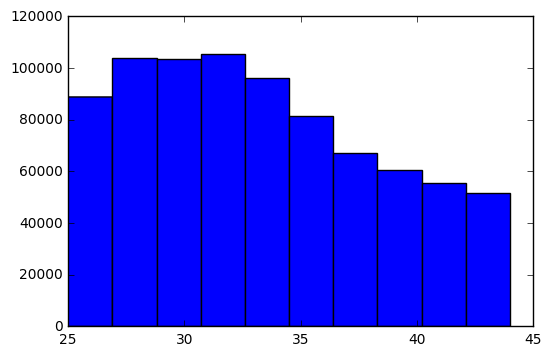

In [155]:
pl.hist(df3['age'])